# Market Values of Soccer Player
### <span style="color:#83898b">*How do the field position and age affect the value of a Soccer Player?*</span>
#### Simon Gotera Vargas - 100872011
 

The website Transfermarkt assigns an approximate market value to each soccer player. A team must pay this market value to the team that currently possesses the player's registration in order to register the player on their squad. The market value of Soccer Players will always depend on how well they perform, but there are also other factors that will affect their value, such as trophies and individual awards won by the player. Nevertheless, for the purposes of this assignment, I will be analyzing a player's value in relation to their age and field position.  The player's position will be divided into four categories  "Goalkeeper" "Defender" "Midfielder" and "Attacker". My dataset is from Kaggle and contains data about soccer players such as their age,market value name,position and more. It includes more than 2600 players from the season 2022/23 including all the players from the top five European leagues which are the English Premier League, the Spanish Laliga, the German Budesliga, the Italian Serie A, and the French Ligue 1, which are the best soccer leagues in the world. All prices are in millions of euros. 

![title](https://www.sports-king.com/fkimages/articles/europe-football-leagues-big-5.jpg)




### Data Collection

In [10]:
import pandas as pd
from IPython.display import display
import seaborn as sns


The dataset is from Kaggle which can be accessed [here](https://www.kaggle.com/datasets/oles04/top-leagues-player)

In [11]:
# loading the data
data = pd.read_csv('top5_leagues_player.csv')

### Data Cleaning

There are multiple types of defenders, midfielders, and attackers in soccer, so the dataset classifies the positions of the players into many categories, I'm just renaming the positions using regular expressions so that it classifies either as a goalkeeper, defender, midfielder, and attacker.

In [12]:
data['position'] = data['position'].str.replace('.*Defender.*', 'Defender', case=False, regex=True)
data['position'] = data['position'].str.replace('.*Attack.*', 'Attacker', case=False, regex=True)
data['position'] = data['position'].str.replace('.*midfield.*', 'Midfielder', case=False, regex=True)


### Analisys

Below is the average age and price of soccer players in their different positions.


In [13]:
group_positions = data.groupby(['position'])
a = group_positions[['age','price',]].mean().round(2)
a["size"] = group_positions['position'].size()
display(a)

,age,price,size
position,,,
Attacker,25.84,13.66,823
Defender,26.30,9.48,907
Goalkeeper,28.13,4.50,315
Midfielder,25.98,11.56,567


On that table, we can see Goalkeepers on average are older and that their value is significantly lower than players in other positions.

Below is a histogram that contains the average price of a Soccer Player in different field positions.

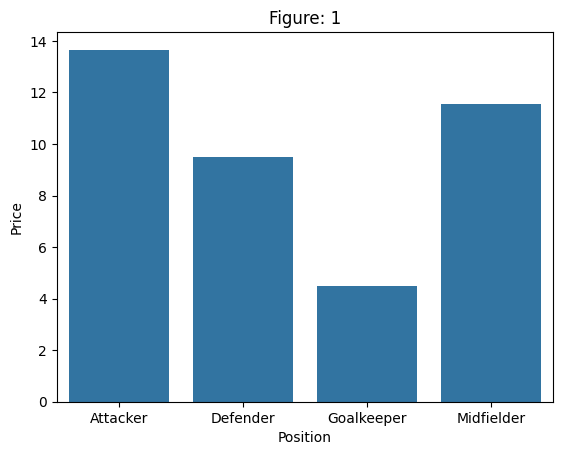

In [14]:
d = data.groupby('position')['price'].mean().round(2).reset_index()
p = sns.barplot(x = 'position',y ='price',data=d )
p = p.set(title = "Figure: 1",xlabel ='Position',ylabel ='Price')

The value of a player is based on their position. As the player plays closer to the opponent's net the value increases, so Atackers are worth on average almost four times more than a goalkeeper. 

Next is a scatterplot containing the average price of a player from every age.

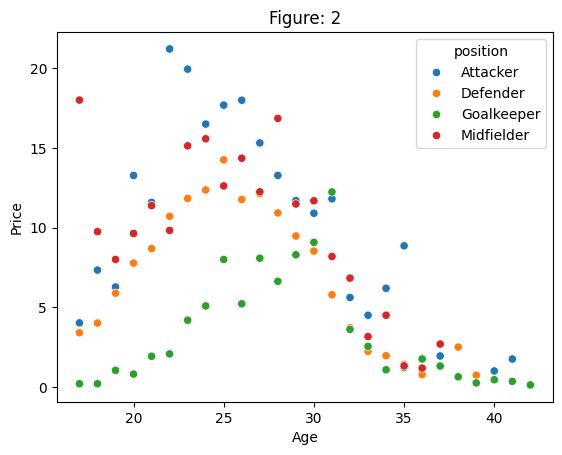

In [15]:
age_price = data.groupby(['age','position'])['price'].mean().reset_index()
a = sns.scatterplot(x= 'age',y = 'price',hue ='position',data =age_price)
a = a.set(title = 'Figure: 2',xlabel='Age',ylabel ='Price')

From this graph, we can see that Soccer Players increase significantly as they get into their 20s and when they get to their 30s their value starts to decrease again.

### Discussion 

As can be seen in Figure 1, there is a linear relation between how close to the opponent's net the player plays and their price, this means that attackers are the most valuable players and goalkeepers are in the cheapest position. This is because attackers are in charge of scoring goals, which is the most desirable skill in soccer and so increases their value. However, because it is easy to defend in soccer but very difficult to attack, defensive skills are not one of the most significant. As a result, strikers and midfielders are the most talented players, which explains why their market value is higher. As shown in Figure 2, the relation between the price and the age of a soccer player is normally distributed this means that soccer players reach their greatest market value in their mid-20s, there are many reasons why it is normally distributed one of them being because they are in their prime physical years and have years of high-level playing experience under their belts. Also, players under 20 are not worth a lot because there is uncertainty about the true level they can reach because they haven't played long enough and the risk of signing a young player and them not performing to the level expected is high, however, as players age, this risk decreases. On the contrary, players older than 30 begin to lose the physical condition necessary to play soccer, as a result, their performance level starts to decrease and so does their value. 

### References

1. Source data - [https://www.kaggle.com/datasets/oles04/top-leagues-player](https://www.kaggle.com/datasets/oles04/top-leagues-player)
2. Pandas for data manipulation.
3. Seaborn for data vizualization.
4. Image link - [https://www.sports-king.com/fkimages/articles/europe-football-leagues-big-5.jpg](https://www.sports-king.com/fkimages/articles/europe-football-leagues-big-5.jpg)